In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [13]:
df = pd.read_csv('ASIANPAINT.csv')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.00,370.00,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.00,375.00,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.00,371.50,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.90,374.50,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.00,370.00,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,ASIANPAINT,EQ,2517.95,2530.0,2575.00,2530.00,2558.0,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0,0.3037
5302,2021-04-27,ASIANPAINT,EQ,2557.90,2545.0,2579.90,2534.00,2571.0,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0,0.3246
5303,2021-04-28,ASIANPAINT,EQ,2574.35,2588.0,2620.25,2575.00,2612.0,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0,0.4216
5304,2021-04-29,ASIANPAINT,EQ,2614.55,2630.0,2642.00,2570.00,2613.0,2613.45,2607.33,1295346,3.377394e+14,64039.0,447979.0,0.3458


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
close_data = df['Close'].dropna()

In [16]:
df.shape

(5306, 14)

In [17]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1247.000952,1247.683952,1264.625349,1230.900697,1247.317132,1247.410903,1247.799926,5.096721e+05,6.942919e+13,41346.011401,2.751281e+05,0.625572
std,1074.399506,1074.025577,1087.238871,1062.629409,1074.432667,1074.476439,1075.057438,8.535993e+05,1.443973e+14,36435.449733,4.157465e+05,0.187597
min,210.750000,210.000000,215.750000,204.000000,210.600000,210.750000,212.220000,2.500000e+01,1.278415e+09,70.000000,2.500000e+01,0.076800
25%,415.737500,415.000000,424.950000,410.000000,416.000000,416.262500,415.692500,1.370750e+04,7.538133e+11,16264.750000,1.262200e+04,0.486200
50%,889.375000,890.000000,903.975000,878.075000,890.000000,889.475000,888.350000,5.713600e+04,1.109437e+13,32402.500000,5.273800e+04,0.616100
75%,1599.037500,1599.800000,1629.675000,1573.037500,1602.500000,1600.762500,1600.982500,8.077905e+05,7.761479e+13,54727.500000,4.383750e+05,0.765500
max,5213.100000,5221.100000,5247.750000,5150.050000,5221.100000,5213.100000,5175.790000,1.154594e+07,2.216650e+15,351347.000000,7.938427e+06,1.000000


In [4]:
#Checking Stationarity using Augmented Dickey-Fuller (ADF) Test
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller Test
result = adfuller(close_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretation
if result[1] < 0.05:
    print("✅ Data is stationary (p < 0.05)")
else:
    print("⚠️ Data is non-stationary (p >= 0.05)")


ADF Statistic: -2.134728936884083
p-value: 0.23078109376737815
Critical Values:
   1%: -3.431585361101588
   5%: -2.8620859027377024
   10%: -2.5670605835348
⚠️ Data is non-stationary (p >= 0.05)


In [5]:
# 📉 First order differencing
diff_data = close_data.diff().dropna()

# Run ADF test again on differenced data
from statsmodels.tsa.stattools import adfuller
result_diff = adfuller(diff_data)
print('ADF Statistic after differencing:', result_diff[0])
print('p-value:', result_diff[1])

if result_diff[1] < 0.05:
    print("✅ Differenced data is now stationary.")
else:
    print("⚠️ Still not stationary — try 2nd order differencing.")


ADF Statistic after differencing: -25.197407633129533
p-value: 0.0
✅ Differenced data is now stationary.


C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.

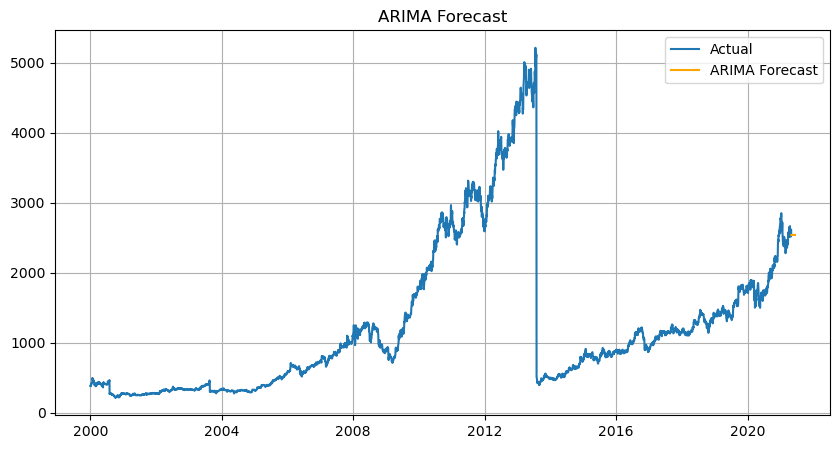

In [9]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(close_data, order=(5, 1, 0)) 
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(close_data, label='Actual')
plt.plot(pd.date_range(close_data.index[-1], periods=31, freq='B')[1:], forecast_arima, label='ARIMA Forecast', color='orange')
plt.legend()
plt.title('ARIMA Forecast')
plt.grid()
plt.show()

C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible star

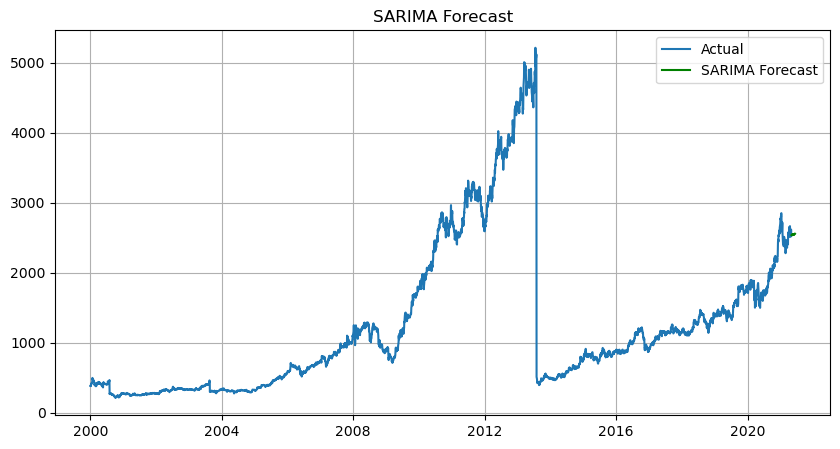

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(close_data, order=(1,1,1), seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit()
forecast_sarima = model_sarima_fit.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(close_data, label='Actual')
plt.plot(pd.date_range(close_data.index[-1], periods=31, freq='B')[1:], forecast_sarima, label='SARIMA Forecast', color='green')
plt.legend()
plt.title('SARIMA Forecast')
plt.grid()

plt.show()

22:25:27 - cmdstanpy - INFO - Chain [1] start processing
22:25:30 - cmdstanpy - INFO - Chain [1] done processing


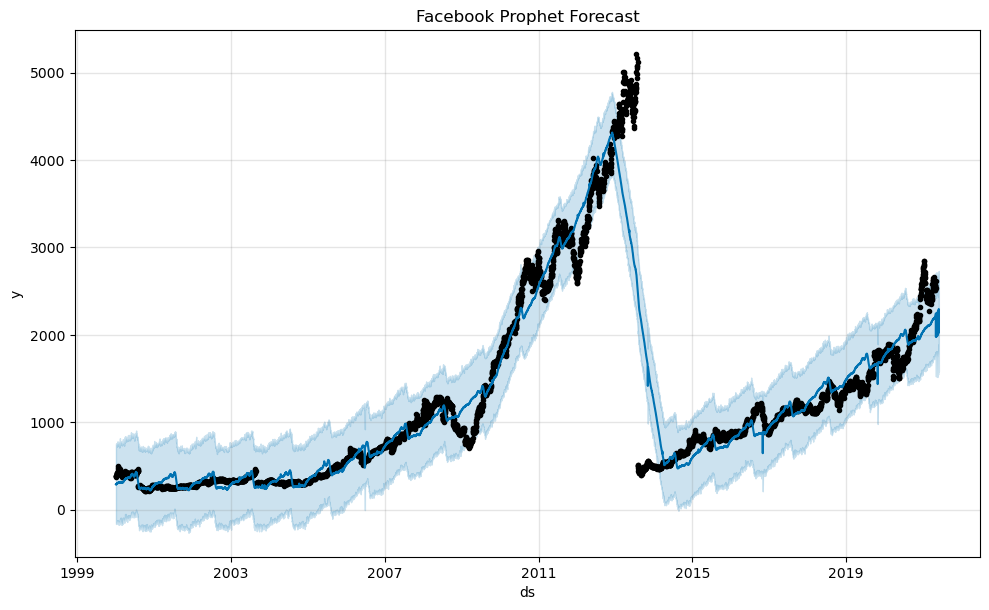

In [11]:
# Prophet needs columns as ds (date) and y (value)
df_prophet = close_data.reset_index().rename(columns={"Date": "ds", "Close": "y"})

model_prophet = Prophet()
model_prophet.fit(df_prophet)

future = model_prophet.make_future_dataframe(periods=30)
forecast_prophet = model_prophet.predict(future)

# Plot
model_prophet.plot(forecast_prophet)
plt.title('Facebook Prophet Forecast')
plt.show()


C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0143
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0014
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 8.1334e-04
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 3.3313e-04
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 4.2635e-04
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 6.8717e-04
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 3.3206e-04
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 6.7967e-04
Epoch 9/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 3.6670e-04
Epoch 10/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 3.0753e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━

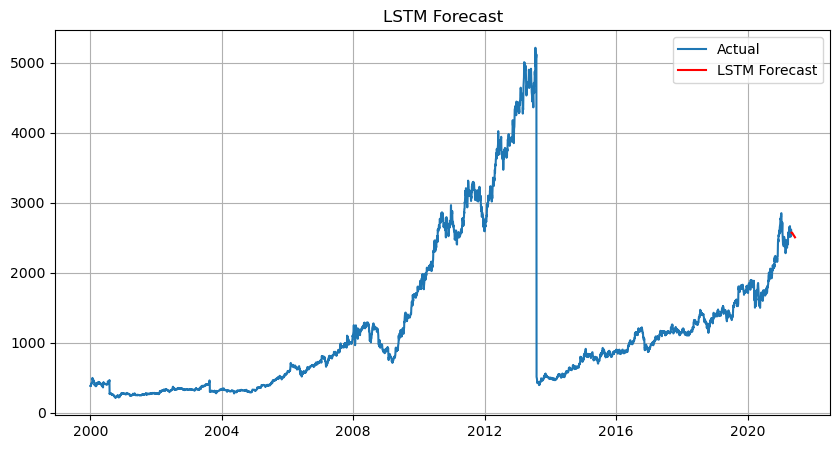

In [12]:
# Preprocess
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_data.values.reshape(-1, 1))

X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10, batch_size=32)

# Forecast
last_60 = scaled_data[-60:]
predictions = []

for _ in range(30):
    inp = last_60.reshape((1, 60, 1))
    pred = model.predict(inp)[0, 0]
    predictions.append(pred)
    last_60 = np.append(last_60[1:], [[pred]], axis=0)

# Inverse transform
forecast_lstm = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(close_data, label='Actual')
plt.plot(pd.date_range(close_data.index[-1], periods=31, freq='B')[1:], forecast_lstm, label='LSTM Forecast', color='red')
plt.legend(); plt.title('LSTM Forecast'); plt.grid(); plt.show()
